In [1]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)
pic_ind = 0

# Лабораторная работа $№5$ 

# «Квазиньютоновские методы»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции методами:
    
•	метод ДФП;

•	метод БФШ (БПГШ);

•	метод Пауэлла.


Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


In [2]:
import numpy as np
def f1(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

In [3]:
eps1 = 0.01
eps2 = 10**(-5)

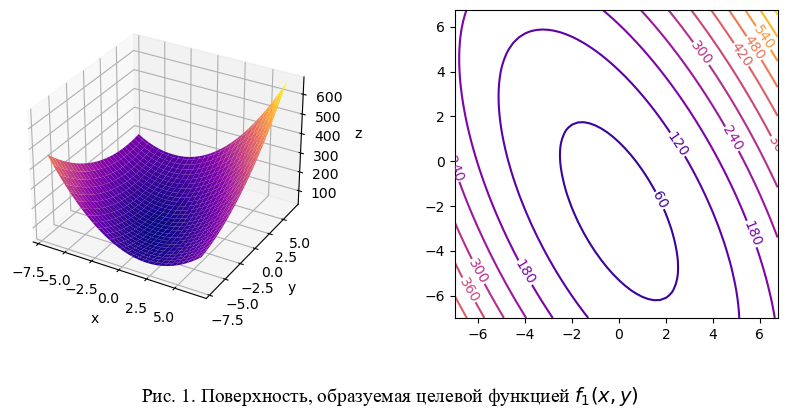

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1)
Z = F1(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
plt.show()

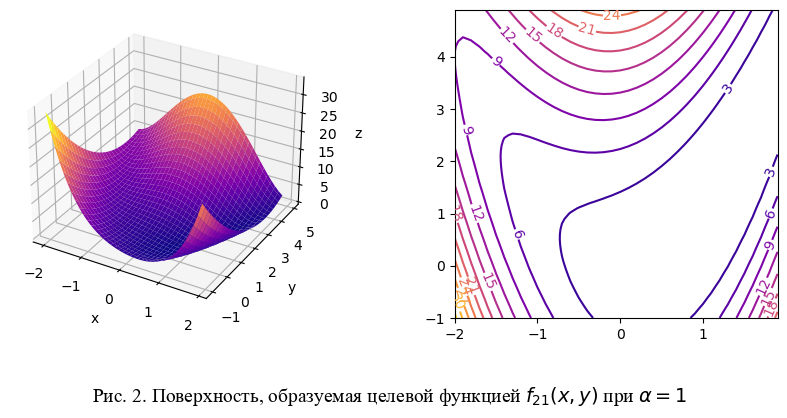

In [5]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21)
Z = F2(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=11, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_{21}(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = -0.2)
 
plt.show()

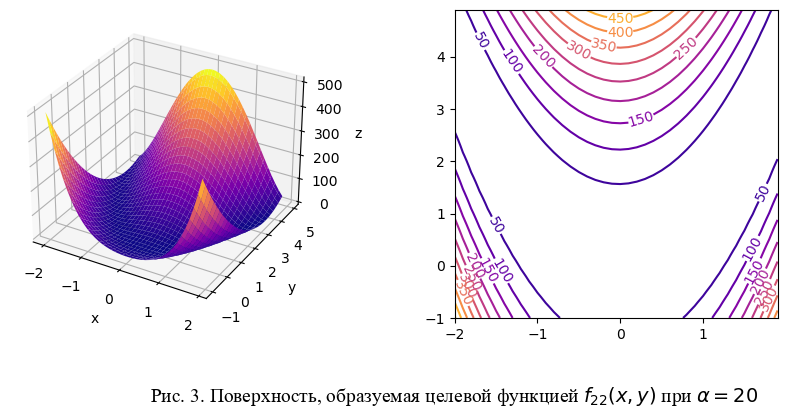

In [6]:
fig = plt.figure(figsize=(10, 4))
axes1 = fig.add_subplot(1, 2, 1, projection='3d')
axes2 = fig.add_subplot(1, 2, 2)

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F22 = np.vectorize(f22)
Z = F22(X, Y)

surf = axes1.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_zlabel('z')
axes1.zaxis.labelpad=4.5


CS00 = axes2.contour(X, Y, Z, levels=10, cmap=cm.plasma, zorder=1)
axes2.clabel(CS00, CS00.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(surf, cax = cbaxes)

plt.subplots_adjust(wspace=0.4)
plt.title('Рис. 3. Поверхность, образуемая целевой функцией $f_{22}(x,y)$ при $α = 20$',
             fontsize=14, fontname='Times New Roman',y=-0.3, x = 0)
 
plt.show()

In [7]:
def grad_xf1(x):
    return 10*x[0]+4*x[1]+4*np.sqrt(5)
def grad_yf1(x):
    return 4*x[0]+4*x[1]+4*np.sqrt(5)

def grad_xf21(x):
    return 2*(-1 + x[0]) + 4*x[0]*(x[0]*x[0] - x[1])
def grad_yf21(x):
    return -2*(x[0]*x[0] - x[1])

def grad_xf22(x):
    return 2*(-1 + x[0]) + 80*x[0]*(x[0]*x[0] - x[1])
def grad_yf22(x):
    return -40*(x[0]*x[0] - x[1])


In [8]:
def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2

def DFPMinSearch(func, x_grad, y_grad, x0, y0, eps):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi = GoldenRatioMinSearch(psi, -20, 20, eps*1e-1)
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps : break
        if k % 2 == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        delta_w = w - w_prev
        A = A - sqvec(delta_x) / np.dot(delta_w, delta_x) - np.dot(np.dot(A, sqvec(delta_w)), np.transpose(A))/np.dot(np.dot(A,delta_w),delta_w)
        k += 1
    return x, func(x[0],x[1]), k

In [9]:
DFPMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-2)

(array([ 3.26722445e-07, -2.23606829e+00]), 41.00000000000032, 2)

In [10]:
DFPMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-5)

(array([-3.93418788e-08, -2.23606795e+00]), 41.0, 2)

In [11]:
DFPMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-2)

(array([ 3.27463395e-07, -2.23606777e+00]), 41.00000000000089, 2)

In [12]:
DFPMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-5)

(array([-2.69396432e-08, -2.23606799e+00]), 41.0, 2)

In [13]:
def BFSMinSearch(func, x_grad, y_grad, x0, y0, eps):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi = GoldenRatioMinSearch(psi, -20, 20, eps*1e-1)
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps : break
        if k % 2 == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        delta_w = w - w_prev
        ro = np.dot(np.dot(A, delta_w),delta_w)
        r = np.dot(A, delta_w)/ro - delta_x/np.dot(delta_x, delta_w)
        A = A - sqvec(delta_x) / np.dot(delta_w, delta_x) - np.dot(np.dot(A, sqvec(delta_w)), np.transpose(A))/ro + ro*sqvec(r)
        k += 1
    return x, func(x[0],x[1]), k

In [14]:
BFSMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-2)

(array([ 3.44562119e-07, -2.23606822e+00]), 41.00000000000037, 2)

In [15]:
BFSMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-5)

(array([-3.98746668e-08, -2.23606797e+00]), 41.00000000000001, 2)

In [16]:
BFSMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-2)

(array([ 2.20512292e-07, -2.23606780e+00]), 41.00000000000046, 2)

In [17]:
BFSMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-5)

(array([-2.19399821e-08, -2.23606799e+00]), 41.0, 2)

In [18]:
def PowellMinSearch(func, x_grad, y_grad, x0, y0, eps):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi = GoldenRatioMinSearch(psi, -20, 20, eps*1e-1)
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps: break
        if k % 2 == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        delta_w = w - w_prev
        wave_delta_x = delta_x + np.dot(A, delta_w)
        A = A - sqvec(wave_delta_x)/np.dot(delta_w, wave_delta_x)
        k += 1
    return x, func(x[0],x[1]), k

In [19]:
PowellMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-2)

(array([ 2.88230901e-07, -2.23606820e+00]), 41.000000000000256, 2)

In [20]:
PowellMinSearch(f1, grad_xf1, grad_yf1, -4, 2.5, 1e-5)

(array([-3.67585369e-08, -2.23606796e+00]), 41.00000000000001, 2)

In [21]:
PowellMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-2)

(array([ 4.25637891e-07, -2.23606772e+00]), 41.00000000000147, 2)

In [22]:
PowellMinSearch(f1, grad_xf1, grad_yf1, 3, -1, 1e-5)

(array([-2.89077719e-08, -2.23606799e+00]), 41.00000000000001, 2)

In [23]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length >= eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls
#########################################################
def InfoDFPMinSearch(func, x_grad, y_grad, x0, y0, eps, sqr=True, upd_step = 2):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    xvals = [x]
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    gradcalls = 1
    fcalls = 0
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps*1e-3)
        fcalls += temp_fcalls
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps and sqr: break
        xvals.append(x)
        if k % upd_step == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        gradcalls += 1
        delta_w = w - w_prev
        A = A - sqvec(delta_x) / np.dot(delta_w, delta_x) - np.dot(np.dot(A, sqvec(delta_w)), np.transpose(A))/np.dot(np.dot(A,delta_w),delta_w)
        k += 1
    return x, func(x[0],x[1]), xvals, k, fcalls, gradcalls
#############################################################
def InfoBFSMinSearch(func, x_grad, y_grad, x0, y0, eps, sqr = True, upd_step = 2):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    xvals = [x]
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    gradcalls = 1
    fcalls = 0
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps*1e-3)
        fcalls += temp_fcalls
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps and sqr: break
        xvals.append(x)
        if k % upd_step == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        gradcalls += 1
        delta_w = w - w_prev
        ro = np.dot(np.dot(A, delta_w),delta_w)
        r = np.dot(A, delta_w)/ro - delta_x/np.dot(delta_x, delta_w)
        A = A - sqvec(delta_x) / np.dot(delta_w, delta_x) - np.dot(np.dot(A, sqvec(delta_w)), np.transpose(A))/ro + ro*sqvec(r)
        k += 1
    return x, func(x[0],x[1]), xvals, k, fcalls, gradcalls
###############################################################
def InfoPowellMinSearch(func, x_grad, y_grad, x0, y0, eps, sqr = True, upd_step = 2):
    def sqvec(v):
        return np.array([[v[0]**2, v[0]*v[1]], [v[1]*v[0], v[1]**2]])
    x = np.array([x0, y0])
    xvals = [x]
    A = np.array([[1, 0], [0, 1]])
    k = 0
    w = np.array([-x_grad(x), -y_grad(x)])
    gradcalls = 1
    fcalls = 0
    while True:
        if np.linalg.norm(w) < eps: break
        p = np.matmul(A, w)
        psi = lambda hi: func(x[0] + hi*p[0], x[1] + hi*p[1])
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps*1e-3)
        fcalls += temp_fcalls
        x_prev = x
        x = x + hi*p
        delta_x = x - x_prev
        if np.linalg.norm(delta_x) < eps and sqr: break
        xvals.append(x)
        if k % upd_step == 0 and k != 0:
            A = np.array([[1, 0], [0, 1]])
            k += 1
            continue
        w_prev = w
        w = np.array([-x_grad(x), -y_grad(x)])
        gradcalls += 1
        delta_w = w - w_prev
        wave_delta_x = delta_x + np.dot(A, delta_w)
        A = A - sqvec(wave_delta_x)/np.dot(delta_w, wave_delta_x)
        k += 1
    return x, func(x[0],x[1]), xvals, k, fcalls, gradcalls

In [24]:
ind = 4
def ExperimentPlot(func, xmin, xmax, ymin, ymax, n1, n2,n3,
                   x1, x2, x3,  
                    ind, xstart, ystart,
                    xspacing, yspacing, fnum = 1, eps = 2):
    xs1 = [el[0] for el in x1]
    ys1 = [el[1] for el in x1]
    xs2 = [el[0] for el in x2]
    ys2 = [el[1] for el in x2]
    xs3 = [el[0] for el in x3]
    ys3 = [el[1] for el in x3]
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(9, 5))
    levels1 = []
    levels2 = []
    levels3 = []
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[2].scatter(xs3[0:n3], ys3[0:n3], color='red', lw=0.05, zorder=2)
    ax[2].scatter(xs3[-1], ys3[-1], color='red', lw=0.05, marker='*', zorder=2)
    
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)
    
    for i in range(0,n3):
        levels3.append(func(xs3[i], ys3[i]))
        ax[2].annotate('', xytext=(xs3[i], ys3[i]), xy=(xs3[i+1], ys3[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels3.sort()
    CS3 = ax[2].contour(X, Y, Z, cmap=cm.plasma, levels=levels3, zorder=1)
    ax[2].clabel(CS3, CS3.levels,inline=True,inline_spacing = 1)

    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    
    ax[2].annotate('$p_{min}$', xytext=(xs3[-1]+xspacing, ys3[-1]-yspacing), xy=(xs3[-1], ys3[-1]))
    ax[2].annotate('$p_{start}$', xytext=(xs3[0]+xspacing, ys3[0]-yspacing), xy=(xs3[0], ys3[0]))
    ax[2].set_xlabel('x \n \n в)')
    
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    ax[2].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом \n \
    ДФП (а), БФШ (б), Пауэлла (в), $ε=10^{'+f'{-eps}'+'}$, $p_{start}=($'+f'{xstart}, {ystart}'+'$)$',
                 fontsize=14, fontname='Times New Roman',y=-0.56, x = -0.9)
    plt.tight_layout()
    plt.subplots_adjust( wspace=0.3,bottom=0.3)
    plt.show()
    

In [25]:
xmin1_f1, fmin1_f1, xs1_f1, its1_f1, fls1_f1, grs1_f1 = InfoDFPMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps1)

In [26]:
xmin2_f1, fmin2_f1, xs2_f1, its2_f1, fls2_f1, grs2_f1 = InfoBFSMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps1)

In [27]:
xmin3_f1, fmin3_f1, xs3_f1, its3_f1, fls3_f1, grs3_f1 = InfoPowellMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps1)

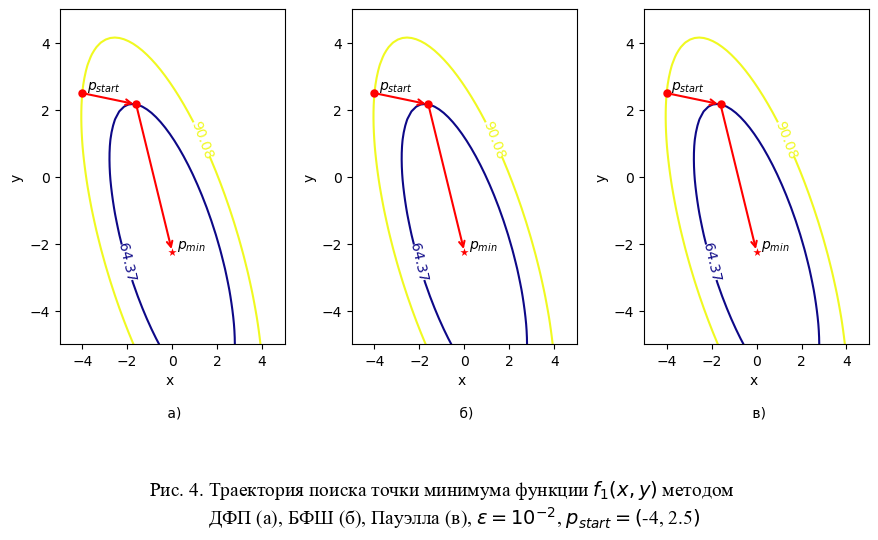

In [28]:
ExperimentPlot(f1, xmin=-5, xmax=5, ymin = -5, ymax=5, n1=its1_f1, n2=its2_f1, n3=its3_f1,
              x1=xs1_f1, x2=xs2_f1, x3=xs3_f1, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.1, fnum=1, eps=2)
ind += 1

In [29]:
xmin4_f1, fmin4_f1, xs4_f1, its4_f1, fls4_f1, grs4_f1 = InfoDFPMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps2)

In [30]:
xmin5_f1, fmin5_f1, xs5_f1, its5_f1, fls5_f1, grs5_f1 = InfoBFSMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps2)

In [31]:
xmin6_f1, fmin6_f1, xs6_f1, its6_f1, fls6_f1, grs6_f1 = InfoPowellMinSearch(f1, grad_xf1, grad_yf1,-4, 2.5, eps2)

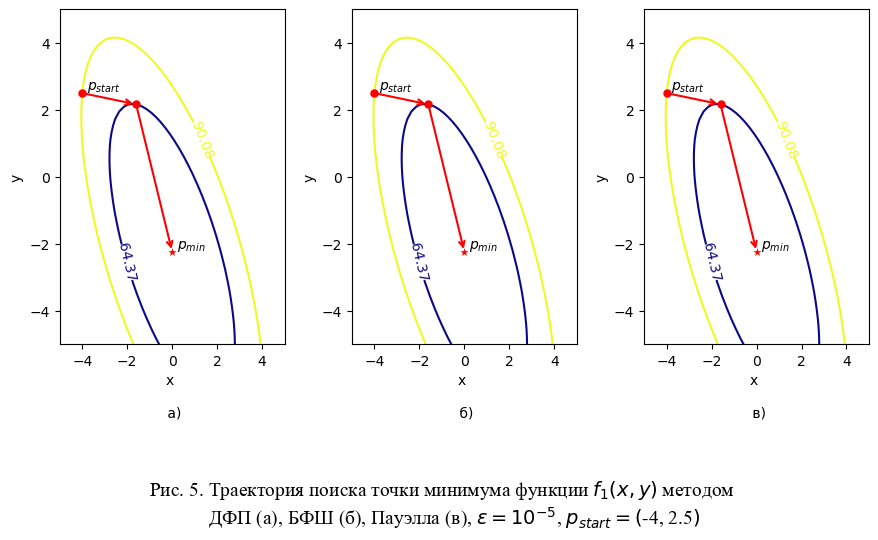

In [32]:
ExperimentPlot(f1, xmin=-5, xmax=5, ymin = -5, ymax=5, n1=its4_f1, n2=its5_f1, n3=its6_f1,
              x1=xs4_f1, x2=xs5_f1, x3=xs6_f1, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.1, fnum=1, eps=5)
ind +=1

In [33]:
xmin7_f1, fmin7_f1, xs7_f1, its7_f1, fls7_f1, grs7_f1 = InfoDFPMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps1)

In [34]:
xmin8_f1, fmin8_f1, xs8_f1, its8_f1, fls8_f1, grs8_f1 = InfoBFSMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps1)

In [35]:
xmin9_f1, fmin9_f1, xs9_f1, its9_f1, fls9_f1, grs9_f1 = InfoPowellMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps1)

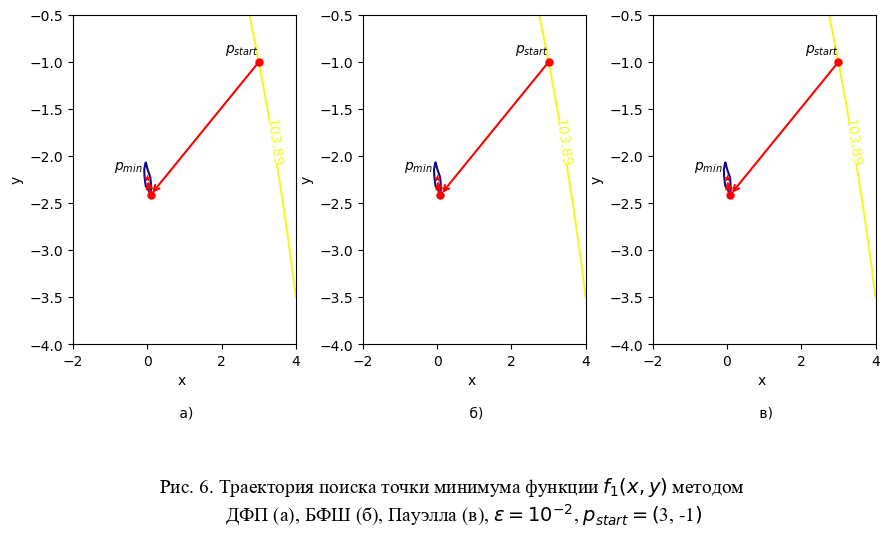

In [36]:
ExperimentPlot(f1, xmin=-2, xmax=4, ymin = -4, ymax=-0.5, n1=its7_f1, n2=its8_f1, n3=its9_f1,
              x1=xs7_f1, x2=xs8_f1, x3=xs9_f1, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=1, eps=2)
ind += 1

In [37]:
xmin10_f1, fmin10_f1, xs10_f1, its10_f1, fls10_f1, grs10_f1 = InfoDFPMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps2)

In [38]:
xmin11_f1, fmin11_f1, xs11_f1, its11_f1, fls11_f1, grs11_f1 = InfoBFSMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps2)

In [39]:
xmin12_f1, fmin12_f1, xs12_f1, its12_f1, fls12_f1, grs12_f1 = InfoPowellMinSearch(f1, grad_xf1, grad_yf1,3, -1, eps2)

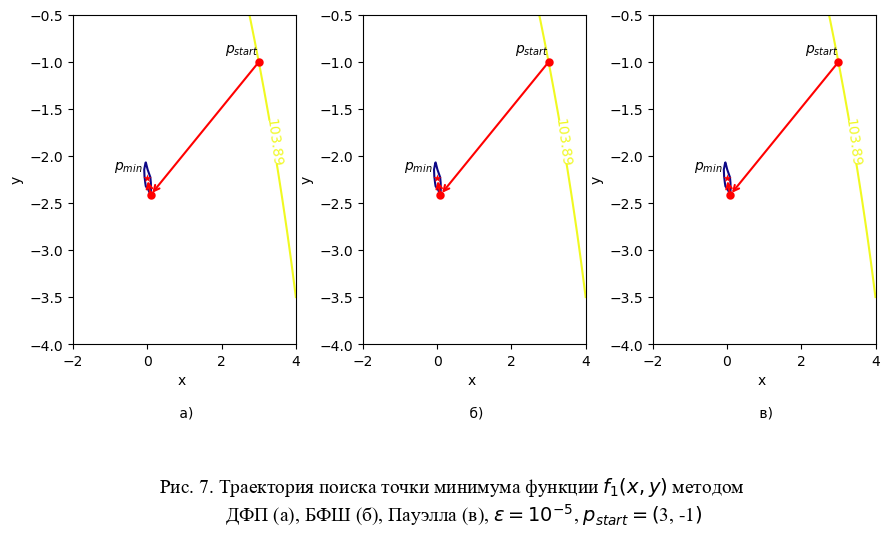

In [40]:
ExperimentPlot(f1, xmin=-2, xmax=4, ymin = -4, ymax=-0.5, n1=its10_f1, n2=its11_f1, n3=its12_f1,
              x1=xs10_f1, x2=xs11_f1, x3=xs12_f1, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=1, eps=5)
ind += 1

# Розенброк, $\alpha= 1$

In [41]:
xmin1_f21, fmin1_f21, xs1_f21, its1_f21, fls1_f21, grs1_f21 = InfoDFPMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps1, 
                                                                                 upd_step = 4,                                                   sqr=False)

In [42]:
xmin2_f21, fmin2_f21, xs2_f21, its2_f21, fls2_f21, grs2_f21 = InfoBFSMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps1,  
                                                                                 upd_step = 4,                                                   sqr=False)

In [43]:
xmin3_f21, fmin3_f21, xs3_f21, its3_f21, fls3_f21, grs3_f21 = InfoPowellMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps1,  
                                                                                   upd_step = 4,                                                 sqr=False)

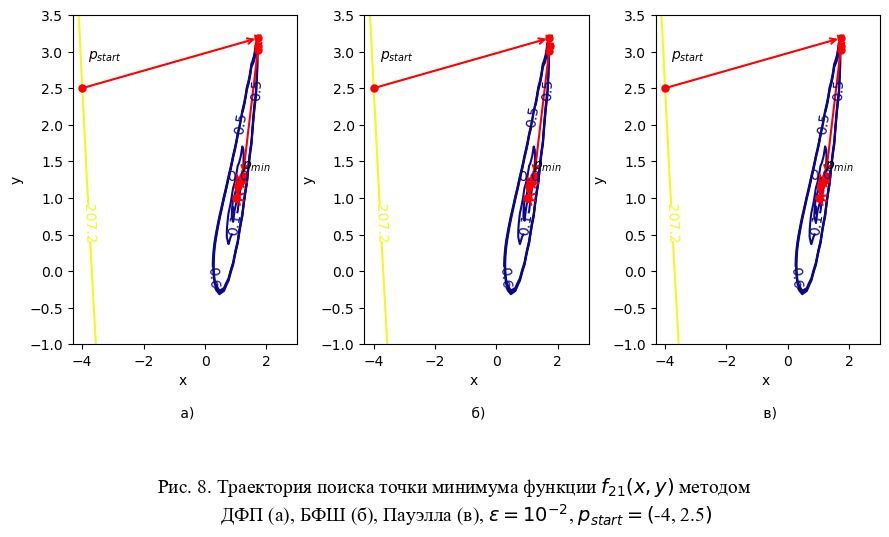

In [44]:
ExperimentPlot(f21, xmin=-4.3, xmax=3, ymin = -1, ymax=3.5, n1=its1_f21, n2=its2_f21, n3=its3_f21,
              x1=xs1_f21, x2=xs2_f21, x3=xs3_f21, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.4, fnum=21, eps=2)
ind += 1

In [45]:
xmin4_f21, fmin4_f21, xs4_f21, its4_f21, fls4_f21, grs4_f21 = InfoDFPMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps2,  
                                                                                upd_step = 4,                                                    sqr=False)

In [46]:
xmin5_f21, fmin5_f21, xs5_f21, its5_f21, fls5_f21, grs5_f21 = InfoBFSMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps2,  
                                                                                upd_step = 4,                                                    sqr=False)

In [47]:
xmin6_f21, fmin6_f21, xs6_f21, its6_f21, fls6_f21, grs6_f21 = InfoPowellMinSearch(f21, grad_xf21, grad_yf21,-4, 2.5, eps2,  
                                                                                  upd_step = 4,                                                  sqr=False)

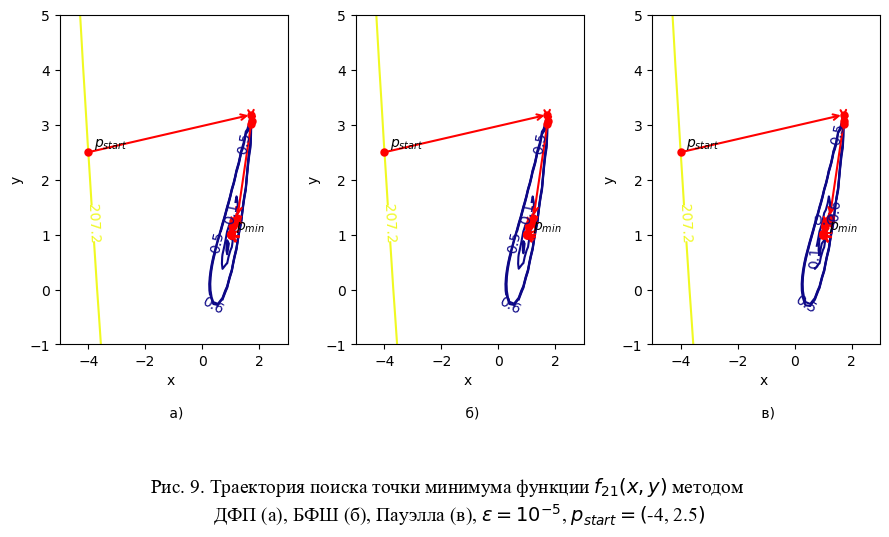

In [48]:
ExperimentPlot(f21, xmin=-5, xmax=3, ymin = -1, ymax=5, n1=its4_f21, n2=its5_f21, n3=its6_f21,
              x1=xs4_f21, x2=xs5_f21, x3=xs6_f21, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.1, fnum=21, eps=5)
ind +=1

In [49]:
xmin7_f21, fmin7_f21, xs7_f21, its7_f21, fls7_f21, grs7_f21 = InfoDFPMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps1,  
                                                                                 upd_step = 4,                                                   sqr=False)

In [50]:
xmin8_f21, fmin8_f21, xs8_f21, its8_f21, fls8_f21, grs8_f21 = InfoBFSMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps1,  
                                                                                upd_step = 4,                                                    sqr=False)

In [51]:
xmin9_f21, fmin9_f21, xs9_f21, its9_f21, fls9_f21, grs9_f21 = InfoPowellMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps1,  
                                                                                   upd_step = 4,                                                 sqr=False)

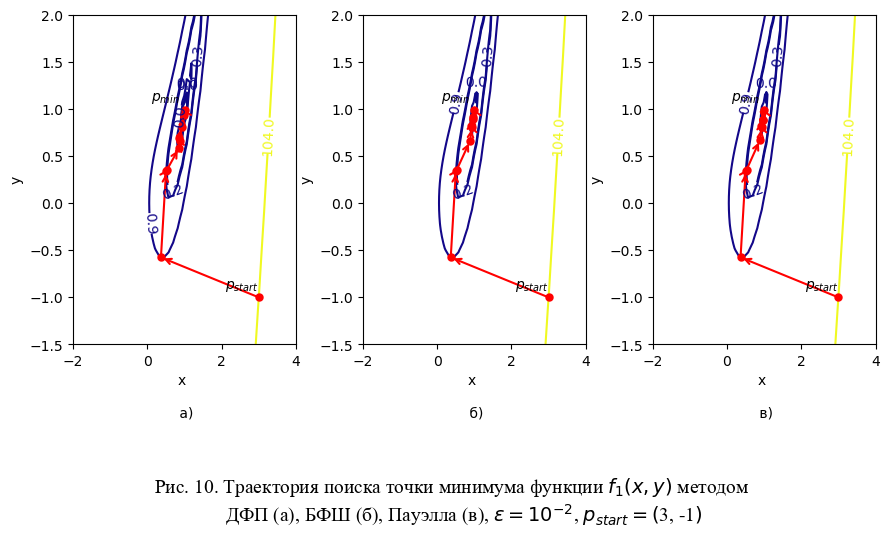

In [52]:
ExperimentPlot(f21, xmin=-2, xmax=4, ymin = -1.5, ymax=2, n1=its7_f21, n2=its8_f21, n3=its9_f21,
              x1=xs7_f21, x2=xs8_f21, x3=xs9_f21, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=1, eps=2)
ind += 1

In [53]:
xmin10_f21, fmin10_f21, xs10_f21, its10_f21, fls10_f21, grs10_f21 = InfoDFPMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps2,  
                                                                                      upd_step = 4,                                              sqr=False)

In [54]:
xmin11_f21, fmin11_f21, xs11_f21, its11_f21, fls11_f21, grs11_f21 = InfoBFSMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps2,  
                                                                                      upd_step = 4,                                              sqr=False)

In [55]:
xmin12_f21, fmin12_f21, xs12_f21, its12_f21, fls12_f21, grs12_f21 = InfoPowellMinSearch(f21, grad_xf21, grad_yf21,3, -1, eps2,  
                                                                                         upd_step = 4,                                           sqr=False)

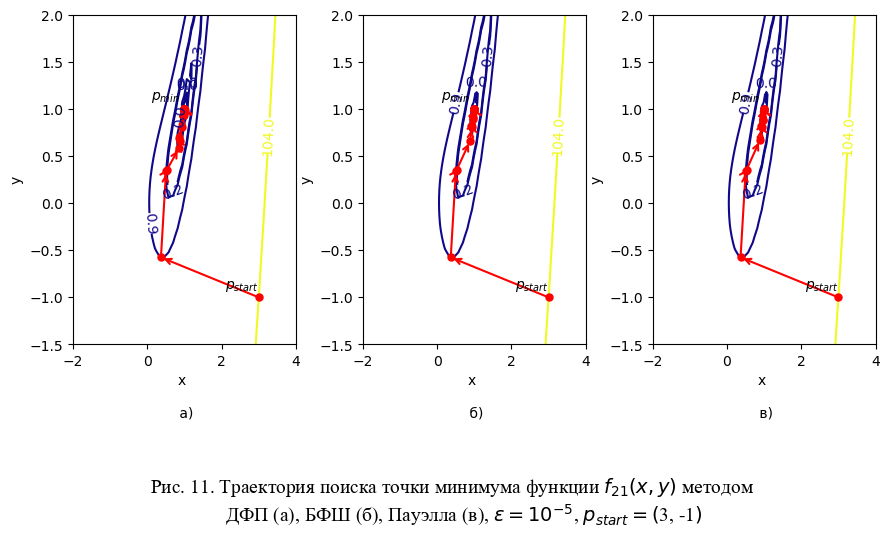

In [56]:
ExperimentPlot(f21, xmin=-2, xmax=4, ymin = -1.5, ymax=2, n1=its10_f21, n2=its11_f21, n3=its12_f21,
              x1=xs10_f21, x2=xs11_f21, x3=xs12_f21, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=21, eps=5)
ind += 1

# Розенброк, $\alpha= 20$

In [57]:
xmin1_f22, fmin1_f22, xs1_f22, its1_f22, fls1_f22, grs1_f22 = InfoDFPMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps1, upd_step=4,
                                                                               
                                                                                                                                    sqr=False)

In [58]:
xmin2_f22, fmin2_f22, xs2_f22, its2_f22, fls2_f22, grs2_f22 = InfoBFSMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps1, upd_step=4, 
                                                                                                                                    sqr=False)

In [59]:
xmin3_f22, fmin3_f22, xs3_f22, its3_f22, fls3_f22, grs3_f22 = InfoPowellMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps1, upd_step=4, 
                                                                                                                                    sqr=False)

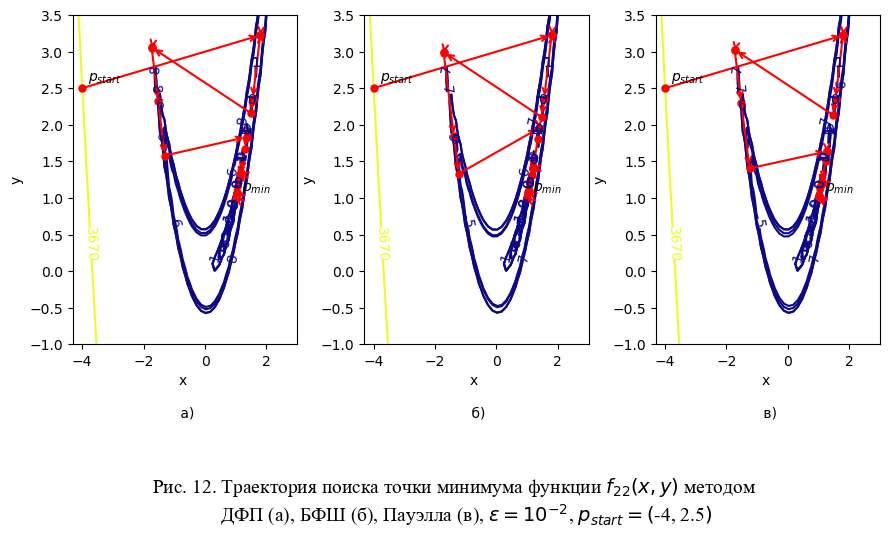

In [60]:
ExperimentPlot(f22, xmin=-4.3, xmax=3, ymin = -1, ymax=3.5, n1=its1_f22, n2=its2_f22, n3=its3_f22,
              x1=xs1_f22, x2=xs2_f22, x3=xs3_f22, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.1, fnum=22, eps=2)
ind += 1

In [61]:
xmin4_f22, fmin4_f22, xs4_f22, its4_f22, fls4_f22, grs4_f22 = InfoDFPMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps2,  
                                                                                      upd_step = 4,                                              sqr=False)

In [62]:
xmin5_f22, fmin5_f22, xs5_f22, its5_f22, fls5_f22, grs5_f22 = InfoBFSMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps2,  
                                                                                  upd_step = 4,                                                  sqr=False)

In [63]:
xmin6_f22, fmin6_f22, xs6_f22, its6_f22, fls6_f22, grs6_f22 = InfoPowellMinSearch(f22, grad_xf22, grad_yf22,-4, 2.5, eps2,  
                                                                                      upd_step = 4,                                              sqr=False)

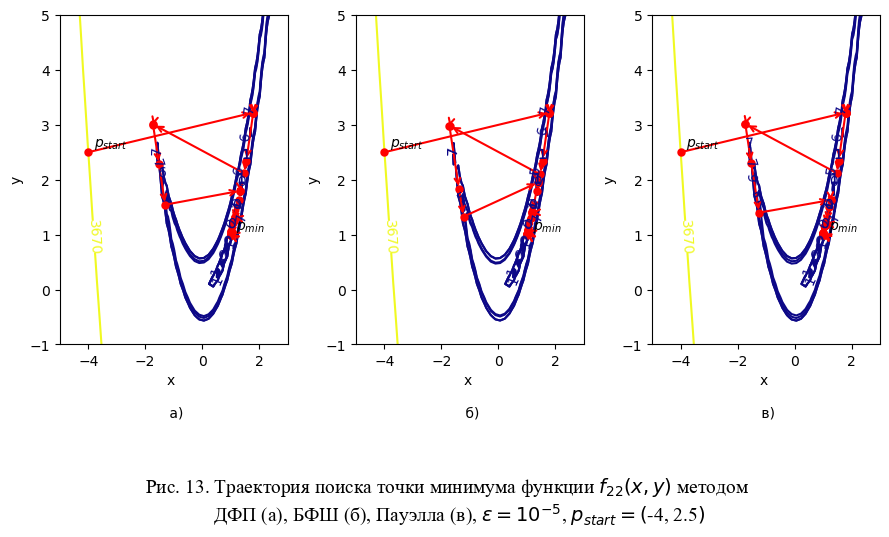

In [64]:
ExperimentPlot(f22, xmin=-5, xmax=3, ymin = -1, ymax=5, n1=its4_f22, n2=its5_f22, n3=its6_f22,
              x1=xs4_f22, x2=xs5_f22, x3=xs6_f22, ind = ind, xstart=-4, ystart=2.5,
              xspacing = 0.2, yspacing = -0.1, fnum=22, eps=5)
ind +=1

In [65]:
xmin7_f22, fmin7_f22, xs7_f22, its7_f22, fls7_f22, grs7_f22 = InfoDFPMinSearch(f22, grad_xf22, grad_yf22, 3, -1, eps1,  
                                                                                upd_step = 4,                                                    sqr=False)

In [66]:
xmin8_f22, fmin8_f22, xs8_f22, its8_f22, fls8_f22, grs8_f22 = InfoBFSMinSearch(f22, grad_xf22, grad_yf22, 3, -1, eps1,  
                                                                                upd_step = 4,                                                    sqr=False)

In [67]:
xmin9_f22, fmin9_f22, xs9_f22, its9_f22, fls9_f22, grs9_f22 = InfoPowellMinSearch(f22, grad_xf22, grad_yf22, 3, -1, eps1,  
                                                                                 upd_step = 4,                                                   sqr=False)

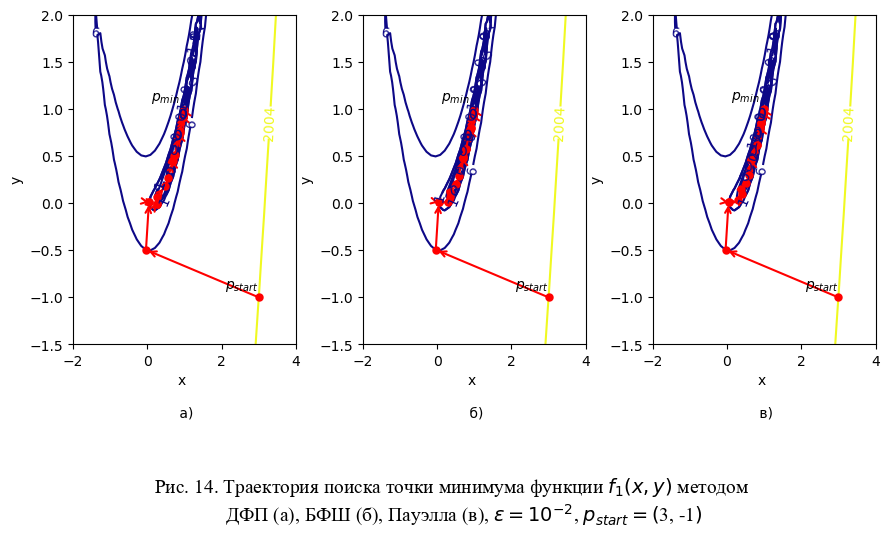

In [68]:
ExperimentPlot(f22, xmin=-2, xmax=4, ymin = -1.5, ymax=2, n1=its7_f22, n2=its8_f22, n3=its9_f22,
              x1=xs7_f22, x2=xs8_f22, x3=xs9_f22, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=1, eps=2)
ind += 1

In [69]:
xmin10_f22, fmin10_f22, xs10_f22, its10_f22, fls10_f22, grs10_f22 = InfoDFPMinSearch(f22, grad_xf22, grad_yf22,3, -1, eps2,  
                                                                                        upd_step = 4,                                            sqr=False)

In [70]:
xmin11_f22, fmin11_f22, xs11_f22, its11_f22, fls11_f22, grs11_f22 = InfoBFSMinSearch(f22, grad_xf22, grad_yf22,3, -1, eps2,  
                                                                                         upd_step = 4,                                           sqr=False)

In [71]:
xmin12_f22, fmin12_f22, xs12_f22, its12_f22, fls12_f22, grs12_f22 = InfoPowellMinSearch(f22, grad_xf22, grad_yf22,3, -1, eps2,  
                                                                                         upd_step = 4,                                           sqr=False)

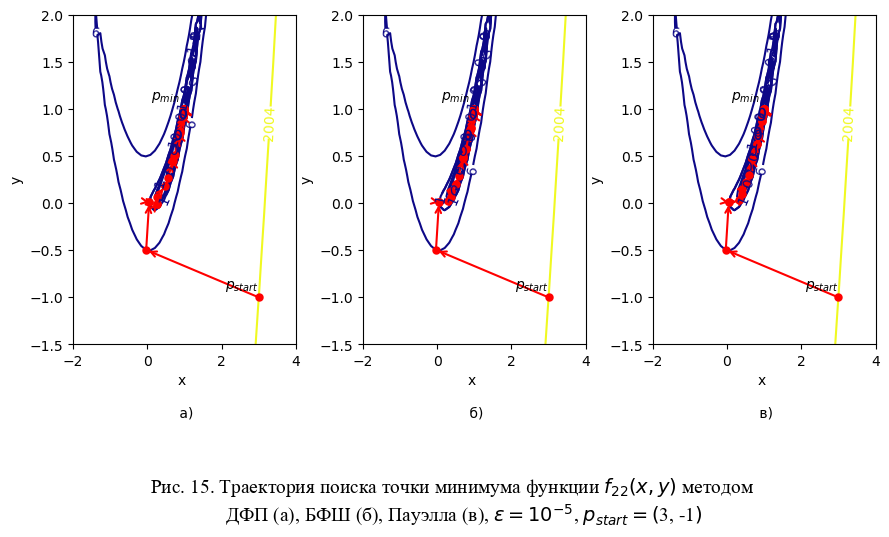

In [72]:
ExperimentPlot(f22, xmin=-2, xmax=4, ymin = -1.5, ymax=2, n1=its10_f22, n2=its11_f22, n3=its12_f22,
              x1=xs10_f22, x2=xs11_f22, x3=xs12_f22, ind = ind, xstart=3, ystart=-1,
              xspacing = -0.9, yspacing = -0.1, fnum=22, eps=5)
ind += 1

In [73]:
import pandas as pd
from IPython.display import HTML

#         # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 
# дфп
# бфш
# пауэлл

its = [its1_f1, its2_f1, its3_f1, its4_f1, its5_f1, its6_f1, its7_f1, its8_f1, its9_f1, its10_f1, its11_f1, its12_f1, 
        its1_f21, its2_f21, its3_f21, its4_f21, its5_f21, its6_f21, its7_f21, its8_f21, its9_f21, its10_f21, its11_f21, its12_f21, 
        its1_f22, its2_f22, its3_f22, its4_f22, its5_f22, its6_f22, its7_f22, its8_f22, its9_f22,
        its10_f22, its11_f22, its12_f22, ]
fls =[fls1_f1, fls2_f1, fls3_f1, fls4_f1, fls5_f1, fls6_f1, fls7_f1, fls8_f1, fls9_f1, fls10_f1, fls11_f1, fls12_f1, 
        fls1_f21, fls2_f21, fls3_f21, fls4_f21, fls5_f21, fls6_f21, fls7_f21, fls8_f21, fls9_f21, fls10_f21, fls11_f21, fls12_f21, 
        fls1_f22, fls2_f22, fls3_f22, fls4_f22, fls5_f22, fls6_f22, fls7_f22, fls8_f22, fls9_f22,
        fls10_f22, fls11_f22, fls12_f22, ]

its1 = [its1_f1, its4_f1, its7_f1, its10_f1, 
        its1_f21, its4_f21, its7_f21, its10_f21, 
        its1_f22, its4_f22, its7_f22, its10_f22]

fls1 = [fls1_f1, fls4_f1, fls7_f1, fls10_f1, 
        fls1_f21, fls4_f21, fls7_f21, fls10_f21, 
        fls1_f22, fls4_f22, fls7_f22, fls10_f22]

grs1 = [grs1_f1, grs4_f1, grs7_f1, grs10_f1, 
        grs1_f21, grs4_f21, grs7_f21, grs10_f21, 
        grs1_f22, grs4_f22, grs7_f22, grs10_f22]
xmins1 = [xmin1_f1[0], xmin4_f1[0], xmin7_f1[0], xmin10_f1[0], 
          xmin1_f21[0], xmin4_f21[0], xmin7_f21[0], xmin10_f21[0], 
          xmin1_f22[0], xmin4_f22[0], xmin7_f22[0], xmin10_f22[0]]
ymins1 = [xmin1_f1[1], xmin4_f1[1], xmin7_f1[1], xmin10_f1[1], 
          xmin1_f21[1], xmin4_f21[1], xmin7_f21[1], xmin10_f21[1], 
          xmin1_f22[1], xmin4_f22[1], xmin7_f22[1], xmin10_f22[1]]
fmins1 = [fmin1_f1, fmin4_f1, fmin7_f1, fmin10_f1, 
          fmin1_f21, fmin4_f21, fmin7_f21, fmin10_f21, 
          fmin1_f22, fmin4_f22, fmin7_f22, fmin10_f22]

funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)', 'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls1],
                    "Кол-во вычисленных градиентов": [elem for elem in grs1],
                    "Точка минимума": [f'({xmins1[0]: 0.2f}, {ymins1[0]: 0.2f})',
                                     f'({xmins1[1]: 0.5f}, {ymins1[1]: 0.5f})',
                                     f'({xmins1[2]: 0.2f}, {ymins1[2]: 0.2f})',
                                     f'({xmins1[3]: 0.5f}, {ymins1[3]: 0.5f})',
                                     f'({xmins1[4]: 0.2f}, {ymins1[4]: 0.2f})',
                                     f'({xmins1[5]: 0.5f}, {ymins1[5]: 0.5f})',
                                     f'({xmins1[6]: 0.2f}, {ymins1[6]: 0.2f})',
                                     f'({xmins1[7]: 0.5f}, {ymins1[7]: 0.5f})',
                                     f'({xmins1[8]: 0.2f}, {ymins1[8]: 0.2f})',
                                     f'({xmins1[9]: 0.5f}, {ymins1[9]: 0.5f})',
                                     f'({xmins1[10]: 0.2f}, {ymins1[10]: 0.2f})',
                                     f'({xmins1[11]: 0.5f}, {ymins1[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins1[0]: 0.2f}',
                                                f'{fmins1[1]: 0.5f}',
                                                f'{fmins1[2]: 0.2f}',
                                                f'{fmins1[3]: 0.5f}',
                                                f'{fmins1[4]: 0.2f}',
                                                f'{fmins1[5]: 0.5f}',
                                                f'{fmins1[6]: 0.2f}',
                                                f'{fmins1[7]: 0.5f}',
                                                f'{fmins1[8]: 0.2f}',
                                                f'{fmins1[9]: 0.5f}',
                                                f'{fmins1[10]: 0.2f}',
                                                f'{fmins1[11]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом ДФП")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,566,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 0.99)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,727,15,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00000, 1.00000)",0.00000


In [74]:

its2 = [its2_f1, its5_f1, its8_f1, its11_f1, 
        its2_f21, its5_f21, its8_f21, its11_f21, 
        its2_f22, its5_f22, its8_f22, its11_f22]

fls2 = [fls2_f1, fls5_f1, fls8_f1, fls11_f1, 
        fls2_f21, fls5_f21, fls8_f21, fls11_f21, 
        fls2_f22, fls5_f22, fls8_f22, fls11_f22]

grs2 = [grs2_f1, grs5_f1, grs8_f1, grs11_f1, 
        grs2_f21, grs5_f21, grs8_f21, grs11_f21, 
        grs2_f22, grs5_f22, grs8_f22, grs11_f22]

xmins2 = [xmin2_f1[0], xmin5_f1[0], xmin8_f1[0], xmin11_f1[0], 
          xmin2_f21[0], xmin5_f21[0], xmin8_f21[0], xmin11_f21[0], 
          xmin2_f22[0], xmin5_f22[0], xmin8_f22[0], xmin11_f22[0]]

ymins2 = [xmin2_f1[1], xmin5_f1[1], xmin8_f1[1], xmin11_f1[1], 
          xmin2_f21[1], xmin5_f21[1], xmin8_f21[1], xmin11_f21[1], 
          xmin2_f22[1], xmin5_f22[1], xmin8_f22[1], xmin11_f22[1]]

fmins2 = [fmin2_f1, fmin5_f1, fmin8_f1, fmin11_f1, 
          fmin2_f21, fmin5_f21, fmin8_f21, fmin11_f21, 
          fmin2_f22, fmin5_f22, fmin8_f22, fmin11_f22]

df2 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls2],
                    "Кол-во вычисленных градиентов": [elem for elem in grs2],
                    "Точка минимума": [f'({xmins2[0]: 0.2f}, {ymins2[0]: 0.2f})',
                                     f'({xmins2[1]: 0.5f}, {ymins2[1]: 0.5f})',
                                     f'({xmins2[2]: 0.2f}, {ymins2[2]: 0.2f})',
                                     f'({xmins2[3]: 0.5f}, {ymins2[3]: 0.5f})',
                                     f'({xmins2[4]: 0.2f}, {ymins2[4]: 0.2f})',
                                     f'({xmins2[5]: 0.5f}, {ymins2[5]: 0.5f})',
                                     f'({xmins2[6]: 0.2f}, {ymins2[6]: 0.2f})',
                                     f'({xmins2[7]: 0.5f}, {ymins2[7]: 0.5f})',
                                     f'({xmins2[8]: 0.2f}, {ymins2[8]: 0.2f})',
                                     f'({xmins2[9]: 0.5f}, {ymins2[9]: 0.5f})',
                                     f'({xmins2[10]: 0.2f}, {ymins2[10]: 0.2f})',
                                     f'({xmins2[11]: 0.5f}, {ymins2[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins2[0]: 0.2f}',
                                                f'{fmins2[1]: 0.5f}',
                                                f'{fmins2[2]: 0.2f}',
                                                f'{fmins2[3]: 0.5f}',
                                                f'{fmins2[4]: 0.2f}',
                                                f'{fmins2[5]: 0.5f}',
                                                f'{fmins2[6]: 0.2f}',
                                                f'{fmins2[7]: 0.5f}',
                                                f'{fmins2[8]: 0.2f}',
                                                f'{fmins2[9]: 0.5f}',
                                                f'{fmins2[10]: 0.2f}',
                                                f'{fmins2[11]: 0.5f}']
                   })
s1 = df2.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций методом БФШ")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s1.set_table_styles([cell_hover, headers])
s1.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s1.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,566,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,646,14,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00001, 1.00001)",0.00000


In [75]:

its3 = [its3_f1, its6_f1, its9_f1, its12_f1, 
        its3_f21, its6_f21, its9_f21, its12_f21, 
        its3_f22, its6_f22, its9_f22, its12_f22]

fls3 = [fls3_f1, fls6_f1, fls9_f1, fls12_f1, 
        fls3_f21, fls6_f21, fls9_f21, fls12_f21, 
        fls3_f22, fls6_f22, fls9_f22, fls12_f22]

grs3 = [grs3_f1, grs6_f1, grs9_f1, grs12_f1, 
        grs3_f21, grs6_f21, grs9_f21, grs12_f21, 
        grs3_f22, grs6_f22, grs9_f22, grs12_f22]

xmins3 = [xmin3_f1[0], xmin6_f1[0], xmin9_f1[0], xmin12_f1[0], 
          xmin3_f21[0], xmin6_f21[0], xmin9_f21[0], xmin12_f21[0], 
          xmin3_f22[0], xmin6_f22[0], xmin9_f22[0], xmin12_f22[0]]

ymins3 = [xmin3_f1[1], xmin6_f1[1], xmin9_f1[1], xmin12_f1[1], 
          xmin3_f21[1], xmin6_f21[1], xmin9_f21[1], xmin12_f21[1], 
          xmin3_f22[1], xmin6_f22[1], xmin9_f22[1], xmin12_f22[1]]

fmins3 = [fmin3_f1, fmin6_f1, fmin9_f1, fmin12_f1, 
          fmin3_f21, fmin6_f21, fmin9_f21, fmin12_f21, 
          fmin3_f22, fmin6_f22, fmin9_f22, fmin12_f22]

df3 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(-4, 2.5)', '(-4, 2.5)', '(3, -1)', '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', 
                                        '(3, -1)',  '(3, -1)', '(-4, 2.5)', '(-4, 2.5)', '(3, -1)',  '(3, -1)',],
                    "Кол-во итераций": [elem for elem in its1], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in fls3],
                    "Кол-во вычисленных градиентов": [elem for elem in grs3],
                    "Точка минимума": [f'({xmins3[0]: 0.2f}, {ymins3[0]: 0.2f})',
                                     f'({xmins3[1]: 0.5f}, {ymins3[1]: 0.5f})',
                                     f'({xmins3[2]: 0.2f}, {ymins3[2]: 0.2f})',
                                     f'({xmins3[3]: 0.5f}, {ymins3[3]: 0.5f})',
                                     f'({xmins3[4]: 0.2f}, {ymins3[4]: 0.2f})',
                                     f'({xmins3[5]: 0.5f}, {ymins3[5]: 0.5f})',
                                     f'({xmins3[6]: 0.2f}, {ymins3[6]: 0.2f})',
                                     f'({xmins3[7]: 0.5f}, {ymins3[7]: 0.5f})',
                                     f'({xmins3[8]: 0.2f}, {ymins3[8]: 0.2f})',
                                     f'({xmins3[9]: 0.5f}, {ymins3[9]: 0.5f})',
                                     f'({xmins3[10]: 0.2f}, {ymins3[10]: 0.2f})',
                                     f'({xmins3[11]: 0.5f}, {ymins3[11]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins3[0]: 0.2f}',
                                                f'{fmins3[1]: 0.5f}',
                                                f'{fmins3[2]: 0.2f}',
                                                f'{fmins3[3]: 0.5f}',
                                                f'{fmins3[4]: 0.2f}',
                                                f'{fmins3[5]: 0.5f}',
                                                f'{fmins3[6]: 0.2f}',
                                                f'{fmins3[7]: 0.5f}',
                                                f'{fmins3[8]: 0.2f}',
                                                f'{fmins3[9]: 0.5f}',
                                                f'{fmins3[10]: 0.2f}',
                                                f'{fmins3[11]: 0.5f}']
                   })
s2 = df3.style.hide(axis="index").set_caption("Табл. 3. Результаты поиска минимумов функций методом Пауэлла")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s2.set_table_styles([cell_hover, headers])
s2.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s2.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s2

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,567,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 0.99)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,568,12,"( 1.00000, 0.99999)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00000, 1.00000)",0.00000


# Выводы

В результате проделанных численных экспериментов были сделаны следующие выводы:
1) Для квадратичных функций методы ДФП, БФШ и Пауэлла сходятся за 2 итерации. Действительно, первый шаг аналогичен наискорейшему спуску, а на второй итерации получается окончательный вид матрицы Ak, аналогичный шагу метода Ньютона.

2) По эффективности методы не сильно отличаются (количество итераций на данных примерах совпадает). В среднем, метод БФШ выигрывает по количеству вычислений целевой функции Розенброка при повышении точности, однако этот выигрыш составляет лишь 10-26%, а иногда и 0%. 


In [76]:
s


Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,566,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 0.99)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,727,15,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00000, 1.00000)",0.00000


In [77]:
s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.01)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,566,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,646,14,"( 1.00000, 1.00000)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00001, 1.00001)",0.00000


In [78]:
s2

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(-4, 2.5)",2,52,3,"(-0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(-4, 2.5)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(3, -1)",2,52,3,"( 0.00, -2.24)",41.00
"f1(x, y)",1.0e-05,"(3, -1)",2,82,3,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-4, 2.5)",10,260,9,"( 1.00, 1.00)",0.00
"f21(x, y)",1.0e-05,"(-4, 2.5)",14,567,12,"( 1.00000, 1.00000)",0.00000
"f21(x, y)",1.0e-02,"(3, -1)",10,260,9,"( 1.00, 0.99)",0.00
"f21(x, y)",1.0e-05,"(3, -1)",18,568,12,"( 1.00000, 0.99999)",0.00000
"f22(x, y)",1.0e-02,"(-4, 2.5)",22,572,18,"( 1.00, 1.00)",0.00
"f22(x, y)",1.0e-05,"(-4, 2.5)",26,1057,21,"( 1.00000, 1.00000)",0.00000
